# Building a Linear Regression Model from Scratch

There are many libraries that can handle Regression, but I would like to make my own models so I better understand what is going on under the hood. I will be using NeuralNine's Tutorial(https://www.youtube.com/watch?v=VmbA0pi2cRQ) and follow along here.

## Notes from Mathematical Theory Chapter

- The Regression Line should Minimize the Errors
- Error Function needs to be defined first so we can minimize it

in y = mx+b we tweak m and b to minimize the error

### Error Function 

Error Function is the Mean Squared Error(MSE) Function

- For each point from 0 to n, get the y value and subtract the position of the function's y value, this produces our average error

### How the Optimization Happens

##### Goal: We want to minimize our Error Value(E), but can only tweak the slope(m) and Y-Intercept(b) in y=mx+b

- We can take the partial derivative with respect to m and b, this gives us the direction of the steepest ascent with respect to E.
- This lets us find the fastest way to increase E, but we can use the inverse of that to find the fastest way to DECREASE E
## Partial Derivative of E with Respect to m (∂E/∂m)

### ∂E/∂m = (1/n) * ∑(2 * (yi-(m * xi+b))) * (-xi)

### ∂E/∂m = (-2/n) * ∑ xi * (2 * (yi-(m * xi+b)))

## Partial Derivative of E with Respect to b (∂E/∂b)

### ∂E/∂b = (-2/n) * ∑(yi-(m * xi+b))

## Gradient Descent Functions

### mNew = mCurrent - Learning Rate * ∂E/∂m

### bNew = bCurrent - Learning Rate * ∂E/∂b

Now it's time to take the theory and put it into practice:

In [55]:
# Creating the Dataset:
import pandas as pd
import yfinance as yf
import datetime as dt
end_dt = dt.datetime.today()
start_dt = end_dt - dt.timedelta(days=365)

# YFinance Data:
yf_data = yf.download('AAPL', start=start_dt, end=end_dt)

# Fama French Data
ff_data = pd.read_csv('/Users/dB/.secret/ff-research-data/F-F_Research_Data_Factors_daily.csv', skiprows=3, index_col=0)
ff_data.drop(index=ff_data.index[-1], axis=0, inplace=True)
ff_data.index = pd.to_datetime(ff_data.index, format='%Y%m%d') # Format the date column(index) into a datetime object

# Concatenate
data = pd.concat([yf_data, ff_data], axis=1)
df = data.dropna()

# Drop Extra Columns
df = df.drop(['Open','Close','High','Low','Volume','SMB','HML'], axis=1)

# Find the Return
df['Ri'] = df['Adj Close'].resample('1D').ffill().pct_change() * 100

df = df.drop(['Adj Close'], axis=1)

df['y'] = df['Ri']-df['RF']
df['x'] = df['Mkt-RF']

df = df.drop(['Mkt-RF','Ri','RF'], axis=1)
df = df.dropna()

[*********************100%%**********************]  1 of 1 completed


## Tutorial Code:

In [56]:
import pandas as pandas
import matplotlib.pyplot as plt

data = df

### Loss Function:

In [57]:
# Build the Loss Function
def loss_function(m, b, points):
    tot_error = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y

        # Find the MSE(Mean Squared Error)
        tot_err = (y - (m * x + b)) ** 2

    tot_error / float(len(points))

We will not be using this code, however, as it is included in the gradient descent. We can use this to calculate the Loss manually, but we won't use it from now on

### Gradient Descent:

In [58]:
def gradient_descent(m_now, b_now, points, learning_rate):
    m_gradient = 0
    b_gradient = 0

    n = len(points)
    
    # Calculate the sum of the Gradient Function
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y

        m_gradient = m_gradient + -(2/n) * x * (y - (m_now * x + b_now)) # Function inside Summation for PartialE/ParitalM
        m_gradient = m_gradient + -(2/n) * (y - (m_now * x + b_now)) # Function inside Summation for PartialE/ParitalB

    # This is the Gradient Descent
    m = m_now - m_gradient * learning_rate
    b = b_now - b_gradient * learning_rate

    return m,b

### Perform Linear Regression:

0.17236237747043656 0.0


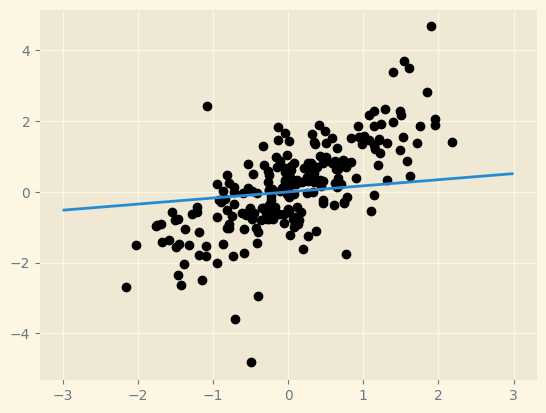

In [61]:
m = 0
b = 0

L = .0001
iterations = 1000 # called epochs in the tutorial

# Iteratively call the Gradient Descent Function, tweaking the m & b values slightly by the values we find * the learning rate
for i in range(iterations):
    m, b = gradient_descent(m, b, data, L)

print(m, b)
plt.style.use('Solarize_Light2')
plt.scatter(data.x, data.y, color='black')
plt.plot(list(range(-3,4)), [m * x + b for x in range(-3,4)])
plt.show()

## In Conclusion:

- Regression Lines are used to find the best fit line for the dataset by minimizing the error, or loss, function.
- The Loss Function is the Mean Squared Errors, or MSE
- We optimize the loss function using Gradient Descent, where we first find where the errors are changing the fastest(Gradient Ascent) and then inverting that to find the sharpest descent.
- This is done by taking the partial derivative of the linear equation y = m * x + b with respect to m and b, giving us 2 summations that we can replicate in a Python for loop.
- We wrote a Loss Function and a Gradient Descent Function in Python for Linear Regression
- Lastly, we tested our functions with the Yahoo Finance and Fama-French Datasets to perform a very simple linear regression to estimate the Beta(The slope of our Regression Line) and the Alpha(The Y-Intercept of our Regression Line)